In [1]:
#%pip install pingouin
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
rawdata = pd.read_csv('Lab_report_01.csv')
rawdata.head()
rawdata.columns

Index(['acc', 'accuracy', 'avg_rt', 'block', 'browser_codename',
       'browser_name', 'browser_version', 'category', 'correct',
       'correct_response', 'count_reset_feedback', 'count_trial_sequence',
       'count_word', 'date_startdate', 'date_startdateUTC', 'date_starttime',
       'experiment_debug', 'experiment_parameters', 'experiment_pilot',
       'experiment_taskname', 'experiment_taskversion', 'jatosStudyResultId',
       'jatosVersion', 'number_letters', 'queryParams_batchId',
       'queryParams_generalMultiple', 'response_keyboard_response',
       'response_time', 'screen_availableHeight', 'screen_availableWidth',
       'screen_colorDepth', 'screen_height', 'screen_pixelDepth',
       'screen_screenX', 'screen_screenY', 'screen_width', 'subject_nr',
       'subject_parity', 'system_os', 'target'],
      dtype='object')

In [3]:
cols = ['jatosStudyResultId','block', 'category','target', 'response_time','correct','acc',  'correct_response',
        'response_keyboard_response', 'count_word','number_letters','count_trial_sequence', 
        'date_startdate', 'date_starttime']

In [4]:
df = rawdata[cols]
df = df.loc[df['block'] == 'trial']
df.head()

,jatosStudyResultId,block,category,target,response_time,correct,acc,correct_response,response_keyboard_response,count_word,number_letters,count_trial_sequence,date_startdate,date_starttime
6,717,trial,NW,rhourth,846,1,100,m,m,0,7,0,29-08-22,10:31:56
7,717,trial,PH,whased,877,1,100,m,m,1,6,1,29-08-22,10:31:56
8,717,trial,NW,dod,797,1,100,m,m,2,3,2,29-08-22,10:31:56
9,717,trial,PH,fluick,790,1,100,m,m,3,6,3,29-08-22,10:31:56
10,717,trial,Word,leg,552,1,100,z,z,4,3,4,29-08-22,10:31:56


In [5]:
df['number_letters'].unique()

array([7, 6, 3, 4, 5])

In [6]:
df_means = df.groupby(['category', 'number_letters']).mean()
df_means.reset_index(inplace = True)
df_means.head(5)

,category,number_letters,jatosStudyResultId,response_time,correct,acc
0,NW,3,704.117647,892.352941,0.941176,89.843137
1,NW,4,704.117647,820.729412,0.923529,89.358824
2,NW,5,704.117647,851.018100,0.936652,90.122172
3,NW,6,704.117647,848.726644,0.913495,90.076125
4,NW,7,704.117647,929.892157,0.941176,90.343137


<AxesSubplot:xlabel='response_time', ylabel='category'>

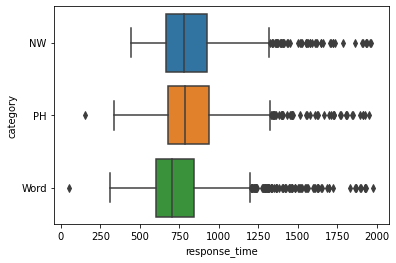

In [7]:
#sns.boxplot(data=df,  x="response_time",y="category")
# looots of outliers 
# let's deal with that in a bad way haha
df_noouts= df.loc[df['response_time'] < 2000]
sns.boxplot(data=df_noouts,  x="response_time",y="category")


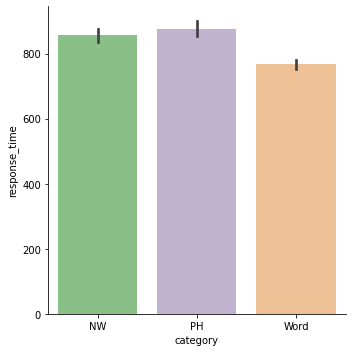

In [8]:
sns.catplot(
    data=df, kind="bar",
    x="category", y="response_time",
    palette = "Accent")

<AxesSubplot:xlabel='number_letters', ylabel='response_time'>

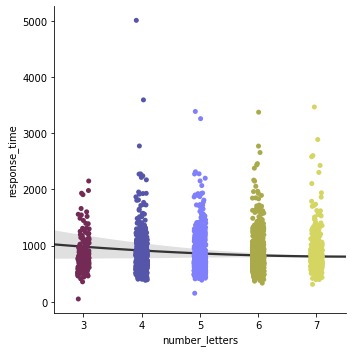

In [9]:
# reponse time over word length colored by category
#sns.lmplot(
 #   data=df,
  #  x="number_letters", y="response_time", hue="category",
   # height=5
#)
# uglyyy, let's fix
sns.catplot(
    data=df, x="number_letters", y="response_time", hue="number_letters",
    palette = 'gist_stern'
)
sns.regplot(
    data=df, x="number_letters", y="response_time", scatter=False, truncate=False, order=2, color=".2",

)

In [10]:
pg.rm_anova(data=df, dv='response_time', within='category', subject='jatosStudyResultId', detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,category,117001.163306,2,58500.581653,17.121273,0.000009,0.109383,0.852317
1,Error,109338.753951,32,3416.836061,NaN,NaN,NaN,NaN


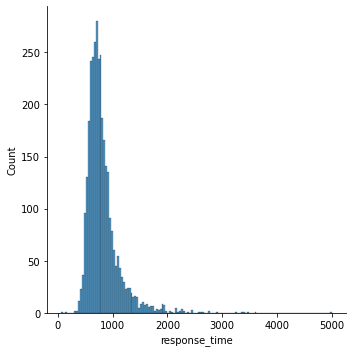

In [11]:
sns.displot(df['response_time'])

In [12]:
# removing outliers that are three standard deviations away from the mean (using z-scores)


df['z_score'] = (df['response_time'] - np.mean(df['response_time'])) / np.std(df['response_time'])
df.shape

(3332, 15)

In [13]:
df_noout = df.loc[(df['z_score'] < 3) & (df['z_score'] > -3)]
df_noout.shape

(3267, 15)

<AxesSubplot:xlabel='number_letters', ylabel='response_time'>

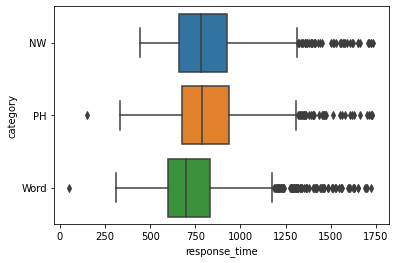

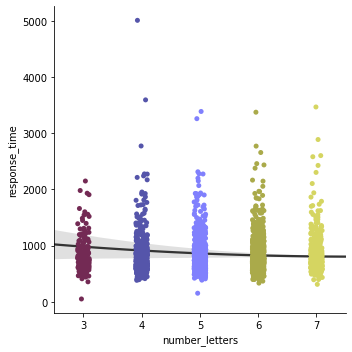

In [14]:
sns.boxplot(data=df_noout,  x="response_time",y="category")

sns.catplot(
    data=df, x="number_letters", y="response_time", hue="number_letters",
    palette = 'gist_stern'
)
sns.regplot(
    data=df, x="number_letters", y="response_time", scatter=False, truncate=False, order=2, color=".2",

)

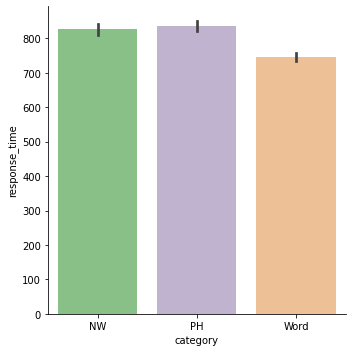

In [15]:
sns.catplot(
    data=df_noout, kind="bar",
    x="category", y="response_time",
    palette = "Accent")

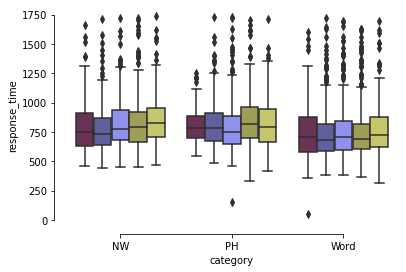

In [16]:
sns.boxplot(data = df_noout, x="category", y="response_time",
            hue="number_letters", palette = 'gist_stern')
sns.despine(offset=10, trim=True)
plt.legend([],[], frameon=False)

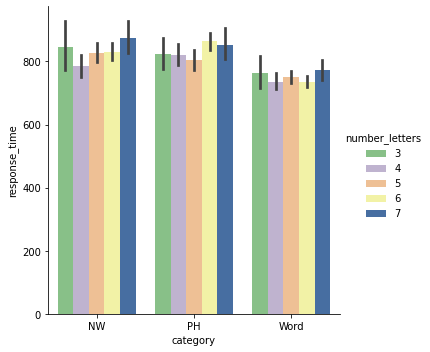

In [17]:
sns.catplot(
    data=df_noout, kind = 'bar', x="category", y="response_time", hue="number_letters",
    palette = 'Accent'
)

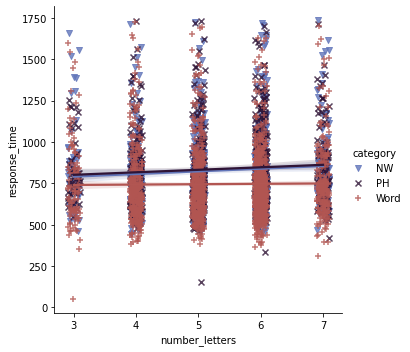

In [21]:
sns.lmplot(x = 'number_letters', y = 'response_time', hue = 'category', data = df_noout, x_jitter = 0.1,
           markers=["v", "x", "+"], palette = 'twilight')